In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/GitHub/ERA-V1/Assignments/S8

Mounted at /content/drive
/content/drive/MyDrive/GitHub/ERA-V1/Assignments/S8


# Import Libraries

In [2]:
!pip install torchsummary
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Statistics

In [3]:
from get_stat import get_stat
get_stat()

Files already downloaded and verified
0.49139968 0.48215827 0.44653124
0.24703233 0.24348505 0.26158768


## Data Transformations



In [4]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))
                                       ])


# Dataset and Creating Train/Test Split

In [5]:
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


# Dataloader Arguments & Test/Train Dataloaders


In [6]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# The model

In [7]:
from model import S8Model1 as Net

CUDA Available? True


# Model Params

In [8]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net(norm='ln').to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
           Dropout-3           [-1, 16, 32, 32]               0
         GroupNorm-4           [-1, 16, 32, 32]              32
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
           Dropout-7           [-1, 16, 32, 32]               0
         GroupNorm-8           [-1, 16, 32, 32]              32
            Conv2d-9            [-1, 8, 32, 32]             128
             ReLU-10            [-1, 8, 32, 32]               0
          Dropout-11            [-1, 8, 32, 32]               0
        GroupNorm-12            [-1, 8, 32, 32]              16
        MaxPool2d-13            [-1, 8, 16, 16]               0
           Conv2d-14           [-1

# Training and Testing



# Let's Train and test our model

In [9]:
from utils import train, test, plot_graph, show_incorrect_images

In [10]:
model = Net(norm='ln').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 20
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=1, threshold=1e-2, verbose=True, factor=0.5)


for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test_loss = test(model, device, test_loader, criterion)
  scheduler.step(test_loss)

Epoch 1


Train: Loss=1.2870 Batch_id=390 Accuracy=36.04: 100%|██████████| 391/391 [00:18<00:00, 20.88it/s]


Test set: Average loss: 0.0109, Accuracy: 5008/10000 (50.08%)

Epoch 2


Train: Loss=1.4681 Batch_id=390 Accuracy=51.62: 100%|██████████| 391/391 [00:19<00:00, 20.23it/s]


Test set: Average loss: 0.0101, Accuracy: 5286/10000 (52.86%)

Epoch 3


Train: Loss=0.9518 Batch_id=390 Accuracy=57.03: 100%|██████████| 391/391 [00:18<00:00, 21.67it/s]


Test set: Average loss: 0.0091, Accuracy: 5848/10000 (58.48%)

Epoch 4


Train: Loss=1.0297 Batch_id=390 Accuracy=60.30: 100%|██████████| 391/391 [00:19<00:00, 19.96it/s]


Test set: Average loss: 0.0090, Accuracy: 5946/10000 (59.46%)

Epoch 5


Train: Loss=0.9165 Batch_id=390 Accuracy=61.97: 100%|██████████| 391/391 [00:17<00:00, 21.78it/s]


Test set: Average loss: 0.0080, Accuracy: 6306/10000 (63.06%)

Epoch 6


Train: Loss=0.9821 Batch_id=390 Accuracy=63.82: 100%|██████████| 391/391 [00:19<00:00, 19.94it/s]


Test set: Average loss: 0.0077, Accuracy: 6487/10000 (64.87%)

Epoch 7


Train: Loss=1.0593 Batch_id=390 Accuracy=64.91: 100%|██████████| 391/391 [00:18<00:00, 21.23it/s]


Test set: Average loss: 0.0079, Accuracy: 6413/10000 (64.13%)

Epoch 8


Train: Loss=0.8946 Batch_id=390 Accuracy=65.78: 100%|██████████| 391/391 [00:19<00:00, 19.81it/s]


Test set: Average loss: 0.0077, Accuracy: 6536/10000 (65.36%)

Epoch 9


Train: Loss=0.8563 Batch_id=390 Accuracy=66.50: 100%|██████████| 391/391 [00:18<00:00, 21.71it/s]


Test set: Average loss: 0.0075, Accuracy: 6582/10000 (65.82%)

Epoch 10


Train: Loss=0.7850 Batch_id=390 Accuracy=67.63: 100%|██████████| 391/391 [00:19<00:00, 20.32it/s]


Test set: Average loss: 0.0075, Accuracy: 6594/10000 (65.94%)

Epoch 11


Train: Loss=0.8944 Batch_id=390 Accuracy=68.07: 100%|██████████| 391/391 [00:18<00:00, 21.35it/s]


Test set: Average loss: 0.0073, Accuracy: 6714/10000 (67.14%)

Epoch 12


Train: Loss=0.9588 Batch_id=390 Accuracy=68.48: 100%|██████████| 391/391 [00:18<00:00, 21.00it/s]


Test set: Average loss: 0.0079, Accuracy: 6507/10000 (65.07%)

Epoch 13


Train: Loss=0.7223 Batch_id=390 Accuracy=68.96: 100%|██████████| 391/391 [00:17<00:00, 22.70it/s]


Test set: Average loss: 0.0074, Accuracy: 6684/10000 (66.84%)

Epoch 00013: reducing learning rate of group 0 to 5.0000e-03.
Epoch 14


Train: Loss=0.8710 Batch_id=390 Accuracy=70.85: 100%|██████████| 391/391 [00:17<00:00, 22.23it/s]


Test set: Average loss: 0.0067, Accuracy: 6952/10000 (69.52%)

Epoch 15


Train: Loss=0.7239 Batch_id=390 Accuracy=71.34: 100%|██████████| 391/391 [00:17<00:00, 21.74it/s]


Test set: Average loss: 0.0068, Accuracy: 6907/10000 (69.07%)

Epoch 16


Train: Loss=0.7599 Batch_id=390 Accuracy=71.35: 100%|██████████| 391/391 [00:18<00:00, 21.70it/s]


Test set: Average loss: 0.0067, Accuracy: 6971/10000 (69.71%)

Epoch 17


Train: Loss=0.7950 Batch_id=390 Accuracy=71.76: 100%|██████████| 391/391 [00:17<00:00, 21.89it/s]


Test set: Average loss: 0.0066, Accuracy: 7023/10000 (70.23%)

Epoch 18


Train: Loss=0.7456 Batch_id=390 Accuracy=72.05: 100%|██████████| 391/391 [00:17<00:00, 22.26it/s]


Test set: Average loss: 0.0067, Accuracy: 6993/10000 (69.93%)

Epoch 00018: reducing learning rate of group 0 to 2.5000e-03.
Epoch 19


Train: Loss=0.9315 Batch_id=390 Accuracy=73.05: 100%|██████████| 391/391 [00:18<00:00, 20.73it/s]


Test set: Average loss: 0.0065, Accuracy: 7082/10000 (70.82%)

Epoch 20


Train: Loss=0.8820 Batch_id=390 Accuracy=73.39: 100%|██████████| 391/391 [00:17<00:00, 22.45it/s]


Test set: Average loss: 0.0066, Accuracy: 7083/10000 (70.83%)



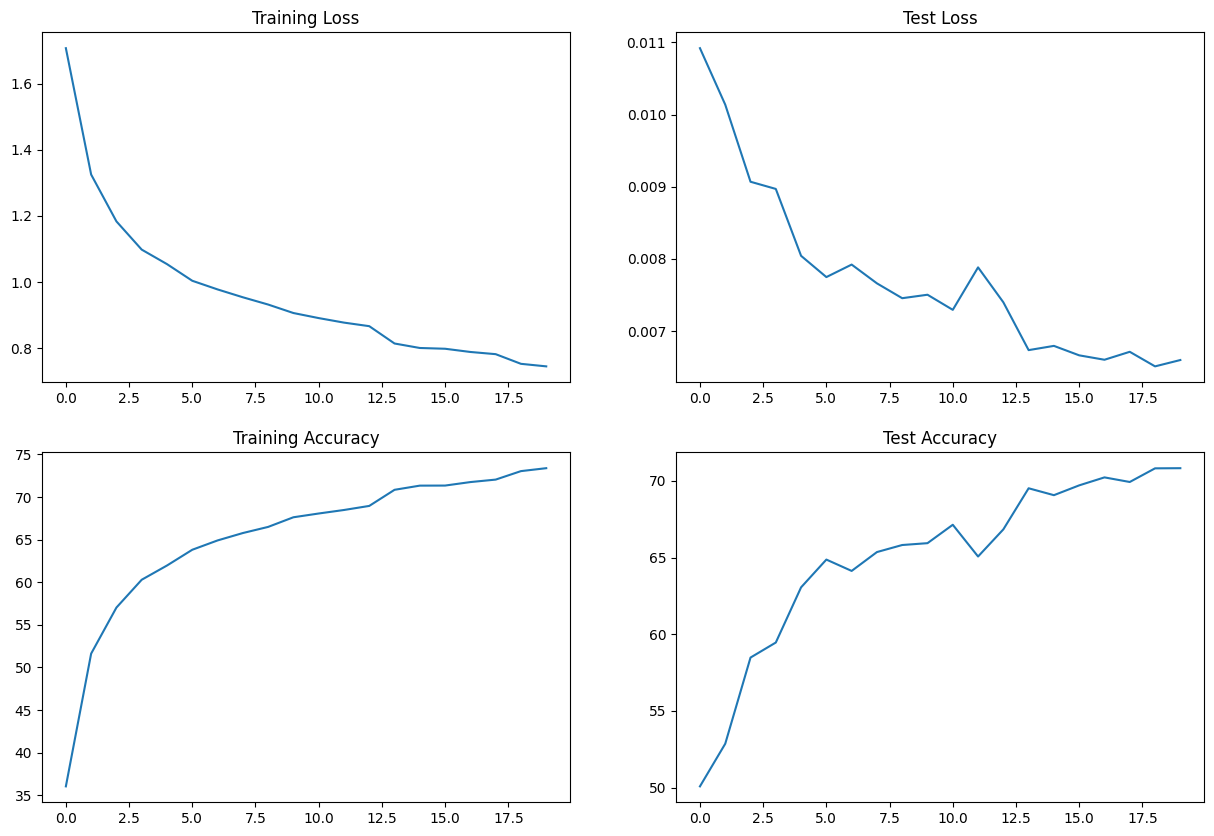

In [11]:
plot_graph()

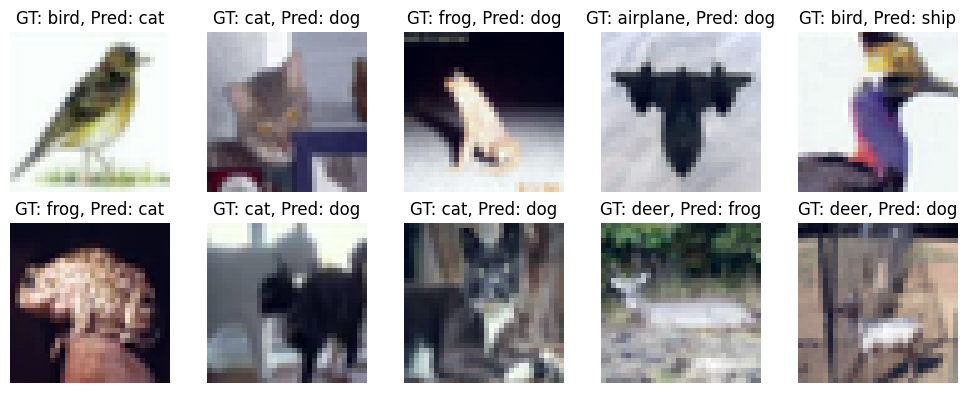

In [12]:
show_incorrect_images()